In [1]:
import numpy as np
import scipy.io as io
glacier_component_path='/home/shashank/Shashank_Github_Packages/old_landlab/landlab/landlab/components/glacier/glacier/'
import sys
sys.path.insert(0,glacier_component_path)
#from glacier import glacier
import glacier
from landlab import RasterModelGrid
import os 
from pygeotools.lib import iolib, geolib, malib,warplib
from imview.lib import pltlib
import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib notebook

In [2]:
datadir = '/media/shashank/Shared_OS_Storage/landlab_directory/'

In [3]:
fn_list = [os.path.join(datadir,'SRTM_DEM_to_be_used.tif'),os.path.join(datadir,'central_himalaya_glabtop2_icethickness_shpclip_trim.tif')]
ds_list = warplib.memwarp_multi_fn(fn_list)
ma_list = [iolib.ds_getma(ds) for ds in ds_list]


Warping all inputs to the following:
Resolution: 50.0
Extent: [386535.0, 3358734.4788867612, 421905.0, 3394215.0]
Projection: '+proj=utm +zone=44 +datum=WGS84 +units=m +no_defs '
Resampling alg: cubic

1 of 2: /media/shashank/Shared_OS_Storage/landlab_directory/SRTM_DEM_to_be_used.tif
nl: 710 ns: 707 res: 50.000
2 of 2: /media/shashank/Shared_OS_Storage/landlab_directory/central_himalaya_glabtop2_icethickness_shpclip_trim.tif
nl: 710 ns: 707 res: 50.000


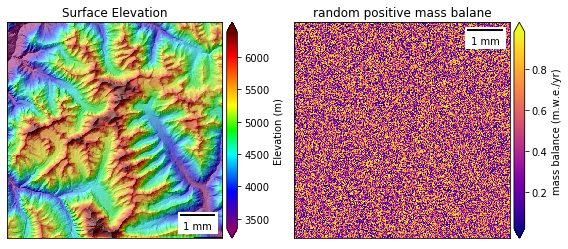

In [23]:
#attempt 1
#Run with hypothetical mass balance input
#Create a numpy matrix of same dimensions
#nx is the number of x columns, ny is the number of y rows and dx is the speration or the resolution of the 
#projected dataset
nx = np.shape(ma_list[0])[1]
ny = np.shape(ma_list[0])[0]
dx = ds_list[0].GetGeoTransform()[1]
b_dot = np.random.random((ny,nx)) #unit is mwea
fig,ax = plt.subplots(1,2,figsize = (8,5))
pltlib.iv(b_dot,ax = ax[1], ds = ds_list[0],cmap='plasma',title = 'random positive mass balane', label = 'mass balance (m.w.e./yr)')
pltlib.iv(ma_list[0],ax = ax[0],title = 'Surface Elevation',ds = ds_list[0],hillshade=True,label = 'Elevation (m)')

In [6]:
def flatten(B,b_dot):
    ### flatten two dimensional matrix
    B = B.T.flatten()
    B[np.isnan(B)] = 0
    S = B
    b_dot = b_dot.T.flatten()
    return B,b_dot,S

In [7]:
#Converting elevation to numpy array with masked element as 
B = ma_list[0].filled(0) # Elevation
B,b_dot,S = flatten(B,b_dot)
dt = 0.08333 #years
t = 0 #years
t_STOP = 200 #years
dictionary = {'S':S,'B':B,'b_dot':b_dot,'dt':dt,'t_STOP':t_STOP,'t':t,'dx':dx,'nx':nx,'ny':ny}
grid = RasterModelGrid(nx,ny,dx)

In [8]:
#Run the model
gla = glacier.Glacier(grid,dictionary)
gla.recursive_steps()

BKS: At t=    0.08 yr ALPHA_I=99.94% and maxima are: H(435514) = 0.083621 			S(206566)=7804.040078

BKS: At t=    0.17 yr ALPHA_I=100.00% and maxima are: H(435514) = 0.166934 			S(206566)=7804.121935

BKS: At t=    0.25 yr ALPHA_I=100.00% and maxima are: H(435514) = 0.250247 			S(206566)=7804.203792

BKS: At t=    0.33 yr ALPHA_I=100.00% and maxima are: H(435514) = 0.333559 			S(206566)=7804.285650

BKS: At t=    0.42 yr ALPHA_I=100.00% and maxima are: H(292108) = 0.416885 			S(206566)=7804.367507

BKS: At t=    0.50 yr ALPHA_I=100.00% and maxima are: H(292108) = 0.500213 			S(206566)=7804.449365

BKS: At t=    0.58 yr ALPHA_I=100.00% and maxima are: H(292108) = 0.583540 			S(206566)=7804.531222

BKS: At t=    0.67 yr ALPHA_I=100.00% and maxima are: H(292108) = 0.666868 			S(206566)=7804.613079

BKS: At t=    0.75 yr ALPHA_I=100.00% and maxima are: H(292108) = 0.750195 			S(206566)=7804.694937

BKS: At t=    0.83 yr ALPHA_I=100.00% and maxima are: H(292108) = 0.833523 			S(206566)=7804

BKS: At t=    6.83 yr ALPHA_I=99.99% and maxima are: H(346479) = 4078.502570 			S(206566)=7810.669896

BKS: At t=    6.92 yr ALPHA_I=99.99% and maxima are: H(345769) = 4179.649395 			S(206566)=7810.751704

BKS: At t=    7.00 yr ALPHA_I=99.98% and maxima are: H(345769) = 4309.707687 			S(206566)=7810.833509

BKS: At t=    7.08 yr ALPHA_I=99.99% and maxima are: H(345059) = 4373.289692 			S(206566)=7810.915311

BKS: At t=    7.17 yr ALPHA_I=99.98% and maxima are: H(344349) = 4466.296187 			S(206566)=7810.997109

BKS: At t=    7.25 yr ALPHA_I=99.99% and maxima are: H(344349) = 4458.339906 			S(206566)=7811.078904

BKS: At t=    7.33 yr ALPHA_I=99.98% and maxima are: H(343639) = 4452.511911 			S(206566)=7811.160694

BKS: At t=    7.42 yr ALPHA_I=99.98% and maxima are: H(343639) = 4467.011544 			S(206566)=7811.242481

BKS: At t=    7.50 yr ALPHA_I=99.98% and maxima are: H(342929) = 4519.936886 			S(206566)=7811.324263

BKS: At t=    7.58 yr ALPHA_I=99.98% and maxima are: H(343639) = 4568.097

BKS: At t=   13.50 yr ALPHA_I=99.98% and maxima are: H(342929) = 4259.168484 			S(206566)=7817.174554

BKS: At t=   13.58 yr ALPHA_I=99.99% and maxima are: H(435939) = 4249.403887 			S(206566)=7817.254644

BKS: At t=   13.67 yr ALPHA_I=99.98% and maxima are: H(342929) = 4264.497830 			S(206566)=7817.334676

BKS: At t=   13.75 yr ALPHA_I=99.99% and maxima are: H(442329) = 4253.086465 			S(206566)=7817.414648

BKS: At t=   13.83 yr ALPHA_I=99.98% and maxima are: H(342929) = 4264.475744 			S(206566)=7817.494557

BKS: At t=   13.92 yr ALPHA_I=99.99% and maxima are: H(436649) = 4254.953302 			S(206566)=7817.574403

BKS: At t=   14.00 yr ALPHA_I=99.98% and maxima are: H(342929) = 4267.091528 			S(206566)=7817.654184

BKS: At t=   14.08 yr ALPHA_I=99.99% and maxima are: H(443039) = 4256.709205 			S(206566)=7817.733898

BKS: At t=   14.17 yr ALPHA_I=99.98% and maxima are: H(342929) = 4269.218686 			S(206566)=7817.813543

BKS: At t=   14.25 yr ALPHA_I=99.99% and maxima are: H(437359) = 4259.088

BKS: At t=   20.17 yr ALPHA_I=99.98% and maxima are: H(342929) = 4324.596417 			S(206566)=7823.214514

BKS: At t=   20.25 yr ALPHA_I=99.99% and maxima are: H(342929) = 4313.875987 			S(206566)=7823.282252

BKS: At t=   20.33 yr ALPHA_I=99.98% and maxima are: H(342929) = 4325.529917 			S(206566)=7823.349708

BKS: At t=   20.42 yr ALPHA_I=99.99% and maxima are: H(439489) = 4314.906153 			S(206566)=7823.416878

BKS: At t=   20.50 yr ALPHA_I=99.98% and maxima are: H(342929) = 4326.931213 			S(206566)=7823.483758

BKS: At t=   20.58 yr ALPHA_I=99.99% and maxima are: H(443039) = 4316.232380 			S(206566)=7823.550346

BKS: At t=   20.67 yr ALPHA_I=99.98% and maxima are: H(342929) = 4327.563051 			S(206566)=7823.616637

BKS: At t=   20.75 yr ALPHA_I=99.99% and maxima are: H(438069) = 4317.404096 			S(206566)=7823.682629

BKS: At t=   20.83 yr ALPHA_I=99.98% and maxima are: H(342929) = 4328.929173 			S(206566)=7823.748317

BKS: At t=   20.92 yr ALPHA_I=99.99% and maxima are: H(443039) = 4318.726

BKS: At t=   26.83 yr ALPHA_I=99.98% and maxima are: H(342929) = 4379.415903 			S(206566)=7827.511830

BKS: At t=   26.92 yr ALPHA_I=99.99% and maxima are: H(438069) = 4369.967284 			S(206566)=7827.549419

BKS: At t=   27.00 yr ALPHA_I=99.98% and maxima are: H(342929) = 4380.888526 			S(206566)=7827.586605

BKS: At t=   27.08 yr ALPHA_I=99.99% and maxima are: H(447299) = 4371.310778 			S(206566)=7827.623390

BKS: At t=   27.17 yr ALPHA_I=99.98% and maxima are: H(342929) = 4382.260822 			S(206566)=7827.659776

BKS: At t=   27.25 yr ALPHA_I=99.99% and maxima are: H(438069) = 4372.670012 			S(206566)=7827.695764

BKS: At t=   27.33 yr ALPHA_I=99.98% and maxima are: H(342929) = 4383.603272 			S(206566)=7827.731356

BKS: At t=   27.42 yr ALPHA_I=99.99% and maxima are: H(445169) = 4374.031331 			S(206566)=7827.766553

BKS: At t=   27.50 yr ALPHA_I=99.98% and maxima are: H(342929) = 4384.928364 			S(206566)=7827.801357

BKS: At t=   27.58 yr ALPHA_I=99.99% and maxima are: H(439489) = 4375.356

BKS: At t=   33.50 yr ALPHA_I=99.98% and maxima are: H(342929) = 4431.561648 			S(206566)=7829.429479

BKS: At t=   33.58 yr ALPHA_I=99.99% and maxima are: H(439489) = 4422.472370 			S(206566)=7829.442343

BKS: At t=   33.67 yr ALPHA_I=99.98% and maxima are: H(342929) = 4432.678025 			S(206566)=7829.455007

BKS: At t=   33.75 yr ALPHA_I=99.99% and maxima are: H(342929) = 4423.606699 			S(206566)=7829.467473

BKS: At t=   33.83 yr ALPHA_I=99.98% and maxima are: H(342929) = 4433.863165 			S(206566)=7829.479746

BKS: At t=   33.92 yr ALPHA_I=99.99% and maxima are: H(444459) = 4424.813544 			S(206566)=7829.491826

BKS: At t=   34.00 yr ALPHA_I=99.98% and maxima are: H(342929) = 4435.055965 			S(206566)=7829.503716

BKS: At t=   34.08 yr ALPHA_I=99.99% and maxima are: H(342929) = 4425.982860 			S(206566)=7829.515419

BKS: At t=   34.17 yr ALPHA_I=99.98% and maxima are: H(342929) = 4436.254255 			S(206566)=7829.526938

BKS: At t=   34.25 yr ALPHA_I=99.99% and maxima are: H(440199) = 4427.205

BKS: At t=   40.17 yr ALPHA_I=99.98% and maxima are: H(342929) = 4476.331911 			S(206566)=7830.003860

BKS: At t=   40.25 yr ALPHA_I=99.99% and maxima are: H(443749) = 4467.680634 			S(206566)=7830.007097

BKS: At t=   40.33 yr ALPHA_I=99.98% and maxima are: H(342929) = 4477.273246 			S(206566)=7830.010273

BKS: At t=   40.42 yr ALPHA_I=99.99% and maxima are: H(445879) = 4468.657407 			S(206566)=7830.013391

BKS: At t=   40.50 yr ALPHA_I=99.98% and maxima are: H(342929) = 4478.285883 			S(206566)=7830.016450

BKS: At t=   40.58 yr ALPHA_I=99.99% and maxima are: H(435939) = 4469.669351 			S(206566)=7830.019452

BKS: At t=   40.67 yr ALPHA_I=99.98% and maxima are: H(342929) = 4479.302047 			S(206566)=7830.022398

BKS: At t=   40.75 yr ALPHA_I=99.99% and maxima are: H(438779) = 4470.677590 			S(206566)=7830.025288

BKS: At t=   40.83 yr ALPHA_I=99.98% and maxima are: H(342929) = 4480.326394 			S(206566)=7830.028125

BKS: At t=   40.92 yr ALPHA_I=99.99% and maxima are: H(435939) = 4471.706

BKS: At t=   46.83 yr ALPHA_I=99.98% and maxima are: H(342929) = 4514.973380 			S(206566)=7830.135929

BKS: At t=   46.91 yr ALPHA_I=99.99% and maxima are: H(438779) = 4506.691195 			S(206566)=7830.136574

BKS: At t=   47.00 yr ALPHA_I=99.98% and maxima are: H(342929) = 4515.871616 			S(206566)=7830.137206

BKS: At t=   47.08 yr ALPHA_I=99.99% and maxima are: H(436649) = 4507.577267 			S(206566)=7830.137825

BKS: At t=   47.16 yr ALPHA_I=99.98% and maxima are: H(342929) = 4516.759545 			S(206566)=7830.138430

BKS: At t=   47.25 yr ALPHA_I=99.99% and maxima are: H(439489) = 4508.479414 			S(206566)=7830.139023

BKS: At t=   47.33 yr ALPHA_I=99.98% and maxima are: H(342929) = 4517.644599 			S(206566)=7830.139604

BKS: At t=   47.41 yr ALPHA_I=99.99% and maxima are: H(342929) = 4509.356923 			S(206566)=7830.140172

BKS: At t=   47.50 yr ALPHA_I=99.98% and maxima are: H(342929) = 4518.526963 			S(206566)=7830.140728

BKS: At t=   47.58 yr ALPHA_I=99.99% and maxima are: H(439489) = 4510.263

BKS: At t=   53.50 yr ALPHA_I=99.98% and maxima are: H(342929) = 4548.585309 			S(206566)=7830.161719

BKS: At t=   53.58 yr ALPHA_I=99.99% and maxima are: H(440199) = 4540.668081 			S(206566)=7830.161868

BKS: At t=   53.66 yr ALPHA_I=99.98% and maxima are: H(342929) = 4549.366610 			S(206566)=7830.162016

BKS: At t=   53.75 yr ALPHA_I=99.99% and maxima are: H(342929) = 4541.442727 			S(206566)=7830.162162

BKS: At t=   53.83 yr ALPHA_I=99.98% and maxima are: H(342929) = 4550.142342 			S(206566)=7830.162306

BKS: At t=   53.91 yr ALPHA_I=99.99% and maxima are: H(443039) = 4542.236430 			S(206566)=7830.162450

BKS: At t=   54.00 yr ALPHA_I=99.98% and maxima are: H(342929) = 4550.921784 			S(206566)=7830.162592

BKS: At t=   54.08 yr ALPHA_I=99.99% and maxima are: H(435229) = 4543.019176 			S(206566)=7830.162732

BKS: At t=   54.16 yr ALPHA_I=99.98% and maxima are: H(342929) = 4551.692699 			S(206566)=7830.162872

BKS: At t=   54.25 yr ALPHA_I=99.99% and maxima are: H(439489) = 4543.822

BKS: At t=   60.16 yr ALPHA_I=99.98% and maxima are: H(342929) = 4578.106484 			S(206566)=7830.172139

BKS: At t=   60.25 yr ALPHA_I=99.99% and maxima are: H(438069) = 4570.592789 			S(206566)=7830.172279

BKS: At t=   60.33 yr ALPHA_I=99.98% and maxima are: H(342929) = 4578.810687 			S(206566)=7830.172420

BKS: At t=   60.41 yr ALPHA_I=99.99% and maxima are: H(443039) = 4571.302825 			S(206566)=7830.172561

BKS: At t=   60.50 yr ALPHA_I=99.98% and maxima are: H(342929) = 4579.528256 			S(206566)=7830.172702

BKS: At t=   60.58 yr ALPHA_I=99.99% and maxima are: H(438069) = 4572.015504 			S(206566)=7830.172845

BKS: At t=   60.66 yr ALPHA_I=99.98% and maxima are: H(342929) = 4580.289608 			S(206566)=7830.172988

BKS: At t=   60.75 yr ALPHA_I=99.99% and maxima are: H(443039) = 4572.744451 			S(206566)=7830.173131

BKS: At t=   60.83 yr ALPHA_I=99.98% and maxima are: H(342929) = 4581.279806 			S(206566)=7830.173275

BKS: At t=   60.91 yr ALPHA_I=99.99% and maxima are: H(438069) = 4573.596

BKS: At t=   66.83 yr ALPHA_I=99.98% and maxima are: H(342929) = 4604.716653 			S(206566)=7830.185364

BKS: At t=   66.91 yr ALPHA_I=99.99% and maxima are: H(435229) = 4597.570949 			S(206566)=7830.185552

BKS: At t=   67.00 yr ALPHA_I=99.98% and maxima are: H(342929) = 4605.347037 			S(206566)=7830.185740

BKS: At t=   67.08 yr ALPHA_I=99.99% and maxima are: H(438069) = 4598.227865 			S(206566)=7830.185929

BKS: At t=   67.16 yr ALPHA_I=99.98% and maxima are: H(342929) = 4605.984651 			S(206566)=7830.186118

BKS: At t=   67.25 yr ALPHA_I=99.99% and maxima are: H(435229) = 4598.930104 			S(206566)=7830.186308

BKS: At t=   67.33 yr ALPHA_I=99.98% and maxima are: H(342929) = 4606.636664 			S(206566)=7830.186498

BKS: At t=   67.41 yr ALPHA_I=99.99% and maxima are: H(440199) = 4599.831570 			S(206566)=7830.186688

BKS: At t=   67.50 yr ALPHA_I=99.98% and maxima are: H(342929) = 4607.387008 			S(206566)=7830.186879

BKS: At t=   67.58 yr ALPHA_I=99.99% and maxima are: H(435229) = 4600.484

BKS: At t=   73.50 yr ALPHA_I=99.98% and maxima are: H(342929) = 4628.812842 			S(206566)=7830.201044

BKS: At t=   73.58 yr ALPHA_I=99.99% and maxima are: H(440909) = 4621.963932 			S(206566)=7830.201239

BKS: At t=   73.66 yr ALPHA_I=99.98% and maxima are: H(342929) = 4629.383615 			S(206566)=7830.201435

BKS: At t=   73.75 yr ALPHA_I=99.99% and maxima are: H(435939) = 4622.542981 			S(206566)=7830.201631

BKS: At t=   73.83 yr ALPHA_I=99.98% and maxima are: H(342929) = 4629.951925 			S(206566)=7830.201826

BKS: At t=   73.91 yr ALPHA_I=99.99% and maxima are: H(442329) = 4623.116260 			S(206566)=7830.202021

BKS: At t=   74.00 yr ALPHA_I=99.98% and maxima are: H(342929) = 4630.518713 			S(206566)=7830.202216

BKS: At t=   74.08 yr ALPHA_I=99.99% and maxima are: H(435229) = 4623.703926 			S(206566)=7830.202410

BKS: At t=   74.16 yr ALPHA_I=99.98% and maxima are: H(342929) = 4631.083660 			S(206566)=7830.202605

BKS: At t=   74.25 yr ALPHA_I=99.99% and maxima are: H(440909) = 4624.271

BKS: At t=   80.16 yr ALPHA_I=99.98% and maxima are: H(342929) = 4650.898460 			S(206566)=7830.215649

BKS: At t=   80.25 yr ALPHA_I=99.99% and maxima are: H(342929) = 4644.350438 			S(206566)=7830.215814

BKS: At t=   80.33 yr ALPHA_I=99.98% and maxima are: H(342929) = 4651.421103 			S(206566)=7830.215977

BKS: At t=   80.41 yr ALPHA_I=99.99% and maxima are: H(435229) = 4644.901012 			S(206566)=7830.216141

BKS: At t=   80.50 yr ALPHA_I=99.98% and maxima are: H(342929) = 4651.943929 			S(206566)=7830.216303

BKS: At t=   80.58 yr ALPHA_I=99.99% and maxima are: H(342929) = 4645.414220 			S(206566)=7830.216466

BKS: At t=   80.66 yr ALPHA_I=99.98% and maxima are: H(342929) = 4652.465620 			S(206566)=7830.216627

BKS: At t=   80.75 yr ALPHA_I=99.99% and maxima are: H(435939) = 4645.959968 			S(206566)=7830.216788

BKS: At t=   80.83 yr ALPHA_I=99.98% and maxima are: H(342929) = 4652.984767 			S(206566)=7830.216949

BKS: At t=   80.91 yr ALPHA_I=99.99% and maxima are: H(342929) = 4646.474

BKS: At t=   86.83 yr ALPHA_I=99.98% and maxima are: H(342929) = 4671.298971 			S(206566)=7830.227011

BKS: At t=   86.91 yr ALPHA_I=99.99% and maxima are: H(439489) = 4665.043013 			S(206566)=7830.227129

BKS: At t=   87.00 yr ALPHA_I=99.98% and maxima are: H(342929) = 4671.784672 			S(206566)=7830.227247

BKS: At t=   87.08 yr ALPHA_I=99.99% and maxima are: H(435939) = 4665.538558 			S(206566)=7830.227365

BKS: At t=   87.16 yr ALPHA_I=99.98% and maxima are: H(342929) = 4672.266123 			S(206566)=7830.227482

BKS: At t=   87.25 yr ALPHA_I=99.99% and maxima are: H(438779) = 4666.026553 			S(206566)=7830.227598

BKS: At t=   87.33 yr ALPHA_I=99.98% and maxima are: H(342929) = 4672.749321 			S(206566)=7830.227714

BKS: At t=   87.41 yr ALPHA_I=99.99% and maxima are: H(435229) = 4666.518300 			S(206566)=7830.227829

BKS: At t=   87.50 yr ALPHA_I=99.98% and maxima are: H(342929) = 4673.232589 			S(206566)=7830.227944

BKS: At t=   87.58 yr ALPHA_I=99.99% and maxima are: H(438069) = 4667.009

BKS: At t=   93.50 yr ALPHA_I=99.98% and maxima are: H(342929) = 4690.218432 			S(206566)=7830.234804

BKS: At t=   93.58 yr ALPHA_I=99.99% and maxima are: H(342929) = 4684.283025 			S(206566)=7830.234882

BKS: At t=   93.66 yr ALPHA_I=99.98% and maxima are: H(342929) = 4690.685251 			S(206566)=7830.234959

BKS: At t=   93.75 yr ALPHA_I=99.99% and maxima are: H(342929) = 4684.853399 			S(206566)=7830.235035

BKS: At t=   93.83 yr ALPHA_I=99.98% and maxima are: H(342929) = 4691.190846 			S(206566)=7830.235111

BKS: At t=   93.91 yr ALPHA_I=99.99% and maxima are: H(435939) = 4685.583725 			S(206566)=7830.235186

BKS: At t=   94.00 yr ALPHA_I=99.98% and maxima are: H(342929) = 4691.796877 			S(206566)=7830.235261

BKS: At t=   94.08 yr ALPHA_I=99.99% and maxima are: H(342929) = 4685.925420 			S(206566)=7830.235336

BKS: At t=   94.16 yr ALPHA_I=99.98% and maxima are: H(342929) = 4692.196486 			S(206566)=7830.235410

BKS: At t=   94.25 yr ALPHA_I=99.99% and maxima are: H(435939) = 4687.134

BKS: At t=  100.16 yr ALPHA_I=99.98% and maxima are: H(342929) = 4708.082314 			S(206566)=7830.239709

BKS: At t=  100.25 yr ALPHA_I=99.99% and maxima are: H(342929) = 4702.319689 			S(206566)=7830.239755

BKS: At t=  100.33 yr ALPHA_I=99.98% and maxima are: H(342929) = 4708.545684 			S(206566)=7830.239802

BKS: At t=  100.41 yr ALPHA_I=99.99% and maxima are: H(342929) = 4702.730513 			S(206566)=7830.239848

BKS: At t=  100.50 yr ALPHA_I=99.98% and maxima are: H(342929) = 4708.985928 			S(206566)=7830.239894

BKS: At t=  100.58 yr ALPHA_I=99.99% and maxima are: H(435229) = 4703.160107 			S(206566)=7830.239940

BKS: At t=  100.66 yr ALPHA_I=99.98% and maxima are: H(342929) = 4709.413249 			S(206566)=7830.239985

BKS: At t=  100.75 yr ALPHA_I=99.99% and maxima are: H(342929) = 4703.589092 			S(206566)=7830.240030

BKS: At t=  100.83 yr ALPHA_I=99.98% and maxima are: H(342929) = 4709.833378 			S(206566)=7830.240075

BKS: At t=  100.91 yr ALPHA_I=99.99% and maxima are: H(438069) = 4703.965

BKS: At t=  106.83 yr ALPHA_I=99.98% and maxima are: H(342929) = 4724.393792 			S(206566)=7830.242618

BKS: At t=  106.91 yr ALPHA_I=99.99% and maxima are: H(435229) = 4718.895516 			S(206566)=7830.242645

BKS: At t=  107.00 yr ALPHA_I=99.98% and maxima are: H(342929) = 4724.824144 			S(206566)=7830.242672

BKS: At t=  107.08 yr ALPHA_I=99.99% and maxima are: H(342929) = 4719.254314 			S(206566)=7830.242699

BKS: At t=  107.16 yr ALPHA_I=99.98% and maxima are: H(342929) = 4725.239022 			S(206566)=7830.242726

BKS: At t=  107.25 yr ALPHA_I=99.99% and maxima are: H(436649) = 4719.630679 			S(206566)=7830.242752

BKS: At t=  107.33 yr ALPHA_I=99.98% and maxima are: H(342929) = 4725.648302 			S(206566)=7830.242778

BKS: At t=  107.41 yr ALPHA_I=99.99% and maxima are: H(342929) = 4720.010794 			S(206566)=7830.242804

BKS: At t=  107.50 yr ALPHA_I=99.98% and maxima are: H(342929) = 4725.865132 			S(206566)=7830.242830

BKS: At t=  107.58 yr ALPHA_I=99.99% and maxima are: H(436649) = 4720.500

BKS: At t=  113.50 yr ALPHA_I=99.98% and maxima are: H(342929) = 4739.936014 			S(206566)=7830.244277

BKS: At t=  113.58 yr ALPHA_I=99.99% and maxima are: H(342929) = 4734.417591 			S(206566)=7830.244293

BKS: At t=  113.66 yr ALPHA_I=99.98% and maxima are: H(342929) = 4740.113121 			S(206566)=7830.244308

BKS: At t=  113.75 yr ALPHA_I=99.99% and maxima are: H(342929) = 4734.761057 			S(206566)=7830.244323

BKS: At t=  113.83 yr ALPHA_I=99.98% and maxima are: H(342929) = 4740.502394 			S(206566)=7830.244338

BKS: At t=  113.91 yr ALPHA_I=99.99% and maxima are: H(342929) = 4735.125731 			S(206566)=7830.244352

BKS: At t=  114.00 yr ALPHA_I=99.98% and maxima are: H(342929) = 4740.870308 			S(206566)=7830.244367

BKS: At t=  114.08 yr ALPHA_I=99.99% and maxima are: H(435939) = 4735.499424 			S(206566)=7830.244382

BKS: At t=  114.16 yr ALPHA_I=99.98% and maxima are: H(342929) = 4741.234801 			S(206566)=7830.244396

BKS: At t=  114.25 yr ALPHA_I=99.99% and maxima are: H(342929) = 4735.869

BKS: At t=  120.16 yr ALPHA_I=99.98% and maxima are: H(342929) = 4754.501850 			S(206566)=7830.245199

BKS: At t=  120.25 yr ALPHA_I=99.99% and maxima are: H(342929) = 4749.274868 			S(206566)=7830.245207

BKS: At t=  120.33 yr ALPHA_I=99.98% and maxima are: H(342929) = 4754.848859 			S(206566)=7830.245215

BKS: At t=  120.41 yr ALPHA_I=99.99% and maxima are: H(342929) = 4749.646867 			S(206566)=7830.245224

BKS: At t=  120.50 yr ALPHA_I=99.98% and maxima are: H(342929) = 4755.201000 			S(206566)=7830.245232

BKS: At t=  120.58 yr ALPHA_I=99.99% and maxima are: H(342929) = 4750.025783 			S(206566)=7830.245240

BKS: At t=  120.66 yr ALPHA_I=99.98% and maxima are: H(342929) = 4755.581038 			S(206566)=7830.245248

BKS: At t=  120.75 yr ALPHA_I=99.99% and maxima are: H(342929) = 4750.550515 			S(206566)=7830.245256

BKS: At t=  120.83 yr ALPHA_I=99.98% and maxima are: H(342929) = 4755.981896 			S(206566)=7830.245264

BKS: At t=  120.91 yr ALPHA_I=99.99% and maxima are: H(342929) = 4751.121

BKS: At t=  126.83 yr ALPHA_I=99.99% and maxima are: H(342929) = 4768.652872 			S(206566)=7830.245701

BKS: At t=  126.91 yr ALPHA_I=99.99% and maxima are: H(342929) = 4763.445332 			S(206566)=7830.245706

BKS: At t=  126.99 yr ALPHA_I=99.99% and maxima are: H(342929) = 4769.077767 			S(206566)=7830.245710

BKS: At t=  127.08 yr ALPHA_I=99.99% and maxima are: H(342929) = 4763.877354 			S(206566)=7830.245715

BKS: At t=  127.16 yr ALPHA_I=99.99% and maxima are: H(342929) = 4769.314914 			S(206566)=7830.245719

BKS: At t=  127.24 yr ALPHA_I=99.99% and maxima are: H(342929) = 4764.258592 			S(206566)=7830.245723

BKS: At t=  127.33 yr ALPHA_I=99.99% and maxima are: H(342929) = 4769.674167 			S(206566)=7830.245728

BKS: At t=  127.41 yr ALPHA_I=99.99% and maxima are: H(342929) = 4764.847151 			S(206566)=7830.245732

BKS: At t=  127.49 yr ALPHA_I=99.99% and maxima are: H(342929) = 4770.107045 			S(206566)=7830.245736

BKS: At t=  127.58 yr ALPHA_I=99.99% and maxima are: H(342929) = 4765.067

BKS: At t=  133.49 yr ALPHA_I=99.99% and maxima are: H(342929) = 4781.602558 			S(206566)=7830.245971

BKS: At t=  133.58 yr ALPHA_I=99.99% and maxima are: H(342929) = 4776.578250 			S(206566)=7830.245974

BKS: At t=  133.66 yr ALPHA_I=99.99% and maxima are: H(342929) = 4781.912727 			S(206566)=7830.245976

BKS: At t=  133.74 yr ALPHA_I=99.99% and maxima are: H(342929) = 4776.887106 			S(206566)=7830.245979

BKS: At t=  133.83 yr ALPHA_I=99.99% and maxima are: H(342929) = 4782.232686 			S(206566)=7830.245981

BKS: At t=  133.91 yr ALPHA_I=99.99% and maxima are: H(342929) = 4777.200129 			S(206566)=7830.245983

BKS: At t=  133.99 yr ALPHA_I=99.99% and maxima are: H(342929) = 4782.541489 			S(206566)=7830.245986

BKS: At t=  134.08 yr ALPHA_I=99.99% and maxima are: H(342929) = 4777.526289 			S(206566)=7830.245988

BKS: At t=  134.16 yr ALPHA_I=99.99% and maxima are: H(342929) = 4782.841080 			S(206566)=7830.245990

BKS: At t=  134.24 yr ALPHA_I=99.99% and maxima are: H(342929) = 4777.848

BKS: At t=  140.16 yr ALPHA_I=99.99% and maxima are: H(342929) = 4794.116455 			S(206566)=7830.246115

BKS: At t=  140.24 yr ALPHA_I=99.99% and maxima are: H(342929) = 4789.156232 			S(206566)=7830.246117

BKS: At t=  140.33 yr ALPHA_I=99.99% and maxima are: H(342929) = 4794.623744 			S(206566)=7830.246118

BKS: At t=  140.41 yr ALPHA_I=99.99% and maxima are: H(342929) = 4789.554023 			S(206566)=7830.246119

BKS: At t=  140.49 yr ALPHA_I=99.99% and maxima are: H(342929) = 4795.169260 			S(206566)=7830.246121

BKS: At t=  140.58 yr ALPHA_I=99.99% and maxima are: H(342929) = 4789.986048 			S(206566)=7830.246122

BKS: At t=  140.66 yr ALPHA_I=99.99% and maxima are: H(342929) = 4795.130444 			S(206566)=7830.246123

BKS: At t=  140.74 yr ALPHA_I=99.99% and maxima are: H(342929) = 4790.243115 			S(206566)=7830.246124

BKS: At t=  140.83 yr ALPHA_I=99.99% and maxima are: H(342929) = 4795.464192 			S(206566)=7830.246125

BKS: At t=  140.91 yr ALPHA_I=99.99% and maxima are: H(342929) = 4790.521

BKS: At t=  146.83 yr ALPHA_I=99.99% and maxima are: H(342929) = 4805.747550 			S(206566)=7830.246192

BKS: At t=  146.91 yr ALPHA_I=99.99% and maxima are: H(342929) = 4801.021827 			S(206566)=7830.246192

BKS: At t=  146.99 yr ALPHA_I=99.99% and maxima are: H(342929) = 4806.028909 			S(206566)=7830.246193

BKS: At t=  147.08 yr ALPHA_I=99.99% and maxima are: H(342929) = 4801.309000 			S(206566)=7830.246194

BKS: At t=  147.16 yr ALPHA_I=99.99% and maxima are: H(342929) = 4806.310310 			S(206566)=7830.246194

BKS: At t=  147.24 yr ALPHA_I=99.99% and maxima are: H(342929) = 4801.599266 			S(206566)=7830.246195

BKS: At t=  147.33 yr ALPHA_I=99.99% and maxima are: H(342929) = 4806.580729 			S(206566)=7830.246196

BKS: At t=  147.41 yr ALPHA_I=99.99% and maxima are: H(342929) = 4801.881395 			S(206566)=7830.246196

BKS: At t=  147.49 yr ALPHA_I=99.99% and maxima are: H(342929) = 4806.861078 			S(206566)=7830.246197

BKS: At t=  147.58 yr ALPHA_I=99.99% and maxima are: H(342929) = 4802.162

BKS: At t=  153.49 yr ALPHA_I=99.99% and maxima are: H(342929) = 4818.141355 			S(206566)=7830.246232

BKS: At t=  153.58 yr ALPHA_I=99.99% and maxima are: H(342929) = 4813.015565 			S(206566)=7830.246232

BKS: At t=  153.66 yr ALPHA_I=99.99% and maxima are: H(342929) = 4817.296459 			S(206566)=7830.246232

BKS: At t=  153.74 yr ALPHA_I=99.99% and maxima are: H(342929) = 4812.981248 			S(206566)=7830.246233

BKS: At t=  153.83 yr ALPHA_I=99.99% and maxima are: H(342929) = 4817.759488 			S(206566)=7830.246233

BKS: At t=  153.91 yr ALPHA_I=99.99% and maxima are: H(342929) = 4813.176679 			S(206566)=7830.246233

BKS: At t=  153.99 yr ALPHA_I=99.99% and maxima are: H(342929) = 4817.734500 			S(206566)=7830.246234

BKS: At t=  154.08 yr ALPHA_I=99.99% and maxima are: H(342929) = 4813.340009 			S(206566)=7830.246234

BKS: At t=  154.16 yr ALPHA_I=99.99% and maxima are: H(342929) = 4818.285939 			S(206566)=7830.246234

BKS: At t=  154.24 yr ALPHA_I=99.99% and maxima are: H(342929) = 4813.702

BKS: At t=  160.16 yr ALPHA_I=99.99% and maxima are: H(342929) = 4828.511068 			S(206566)=7830.246253

BKS: At t=  160.24 yr ALPHA_I=99.99% and maxima are: H(342929) = 4823.961343 			S(206566)=7830.246253

BKS: At t=  160.33 yr ALPHA_I=99.99% and maxima are: H(342929) = 4828.755776 			S(206566)=7830.246253

BKS: At t=  160.41 yr ALPHA_I=99.99% and maxima are: H(342929) = 4824.224155 			S(206566)=7830.246253

BKS: At t=  160.49 yr ALPHA_I=99.99% and maxima are: H(342929) = 4829.015283 			S(206566)=7830.246253

BKS: At t=  160.58 yr ALPHA_I=99.99% and maxima are: H(342929) = 4824.474457 			S(206566)=7830.246254

BKS: At t=  160.66 yr ALPHA_I=99.99% and maxima are: H(342929) = 4829.303395 			S(206566)=7830.246254

BKS: At t=  160.74 yr ALPHA_I=99.99% and maxima are: H(342929) = 4824.733115 			S(206566)=7830.246254

BKS: At t=  160.83 yr ALPHA_I=99.99% and maxima are: H(342929) = 4829.554866 			S(206566)=7830.246254

BKS: At t=  160.91 yr ALPHA_I=99.99% and maxima are: H(342929) = 4825.061

BKS: At t=  166.83 yr ALPHA_I=99.99% and maxima are: H(342929) = 4839.368547 			S(206566)=7830.246264

BKS: At t=  166.91 yr ALPHA_I=99.99% and maxima are: H(342929) = 4834.896160 			S(206566)=7830.246264

BKS: At t=  166.99 yr ALPHA_I=99.99% and maxima are: H(342929) = 4839.795691 			S(206566)=7830.246264

BKS: At t=  167.08 yr ALPHA_I=99.99% and maxima are: H(342929) = 4835.298654 			S(206566)=7830.246264

BKS: At t=  167.16 yr ALPHA_I=99.99% and maxima are: H(342929) = 4840.415551 			S(206566)=7830.246264

BKS: At t=  167.24 yr ALPHA_I=99.99% and maxima are: H(342929) = 4836.186016 			S(206566)=7830.246264

BKS: At t=  167.33 yr ALPHA_I=99.99% and maxima are: H(342929) = 4840.663715 			S(206566)=7830.246264

BKS: At t=  167.41 yr ALPHA_I=99.99% and maxima are: H(342929) = 4835.982576 			S(206566)=7830.246264

BKS: At t=  167.49 yr ALPHA_I=99.99% and maxima are: H(342929) = 4840.545509 			S(206566)=7830.246264

BKS: At t=  167.58 yr ALPHA_I=99.99% and maxima are: H(342929) = 4836.687

BKS: At t=  173.49 yr ALPHA_I=99.99% and maxima are: H(342929) = 4849.794500 			S(206566)=7830.246269

BKS: At t=  173.58 yr ALPHA_I=99.99% and maxima are: H(342929) = 4845.358753 			S(206566)=7830.246269

BKS: At t=  173.66 yr ALPHA_I=99.99% and maxima are: H(342929) = 4850.007409 			S(206566)=7830.246269

BKS: At t=  173.74 yr ALPHA_I=99.99% and maxima are: H(342929) = 4845.596110 			S(206566)=7830.246269

BKS: At t=  173.83 yr ALPHA_I=99.99% and maxima are: H(342929) = 4850.239531 			S(206566)=7830.246269

BKS: At t=  173.91 yr ALPHA_I=99.99% and maxima are: H(342929) = 4845.782070 			S(206566)=7830.246269

BKS: At t=  173.99 yr ALPHA_I=99.99% and maxima are: H(342929) = 4850.501593 			S(206566)=7830.246269

BKS: At t=  174.08 yr ALPHA_I=99.99% and maxima are: H(342929) = 4846.046585 			S(206566)=7830.246270

BKS: At t=  174.16 yr ALPHA_I=99.99% and maxima are: H(342929) = 4850.709871 			S(206566)=7830.246270

BKS: At t=  174.24 yr ALPHA_I=99.99% and maxima are: H(342929) = 4846.297

BKS: At t=  180.16 yr ALPHA_I=99.99% and maxima are: H(342929) = 4858.958569 			S(206566)=7830.246272

BKS: At t=  180.24 yr ALPHA_I=99.99% and maxima are: H(342929) = 4854.742232 			S(206566)=7830.246272

BKS: At t=  180.33 yr ALPHA_I=99.99% and maxima are: H(342929) = 4859.184171 			S(206566)=7830.246272

BKS: At t=  180.41 yr ALPHA_I=99.99% and maxima are: H(342929) = 4854.984681 			S(206566)=7830.246272

BKS: At t=  180.49 yr ALPHA_I=99.99% and maxima are: H(342929) = 4859.407205 			S(206566)=7830.246272

BKS: At t=  180.58 yr ALPHA_I=99.99% and maxima are: H(342929) = 4855.191372 			S(206566)=7830.246272

BKS: At t=  180.66 yr ALPHA_I=99.99% and maxima are: H(342929) = 4859.656181 			S(206566)=7830.246272

BKS: At t=  180.74 yr ALPHA_I=99.99% and maxima are: H(342929) = 4855.447079 			S(206566)=7830.246272

BKS: At t=  180.83 yr ALPHA_I=99.99% and maxima are: H(342929) = 4859.873232 			S(206566)=7830.246272

BKS: At t=  180.91 yr ALPHA_I=99.99% and maxima are: H(342929) = 4855.700

BKS: At t=  186.83 yr ALPHA_I=99.99% and maxima are: H(342929) = 4868.461742 			S(206566)=7830.246274

BKS: At t=  186.91 yr ALPHA_I=99.99% and maxima are: H(342929) = 4864.244402 			S(206566)=7830.246274

BKS: At t=  186.99 yr ALPHA_I=99.99% and maxima are: H(342929) = 4868.467432 			S(206566)=7830.246274

BKS: At t=  187.08 yr ALPHA_I=99.99% and maxima are: H(342929) = 4864.435554 			S(206566)=7830.246274

BKS: At t=  187.16 yr ALPHA_I=99.99% and maxima are: H(342929) = 4868.729543 			S(206566)=7830.246274

BKS: At t=  187.24 yr ALPHA_I=99.99% and maxima are: H(342929) = 4864.711865 			S(206566)=7830.246274

BKS: At t=  187.33 yr ALPHA_I=99.99% and maxima are: H(342929) = 4868.952083 			S(206566)=7830.246274

BKS: At t=  187.41 yr ALPHA_I=99.99% and maxima are: H(342929) = 4864.917665 			S(206566)=7830.246274

BKS: At t=  187.49 yr ALPHA_I=99.99% and maxima are: H(342929) = 4869.208874 			S(206566)=7830.246274

BKS: At t=  187.58 yr ALPHA_I=99.99% and maxima are: H(342929) = 4865.133

BKS: At t=  193.49 yr ALPHA_I=99.99% and maxima are: H(342929) = 4877.545518 			S(206566)=7830.246275

BKS: At t=  193.58 yr ALPHA_I=99.99% and maxima are: H(342929) = 4873.548072 			S(206566)=7830.246275

BKS: At t=  193.66 yr ALPHA_I=99.99% and maxima are: H(342929) = 4877.764091 			S(206566)=7830.246275

BKS: At t=  193.74 yr ALPHA_I=99.99% and maxima are: H(342929) = 4873.768750 			S(206566)=7830.246275

BKS: At t=  193.83 yr ALPHA_I=99.99% and maxima are: H(342929) = 4877.986637 			S(206566)=7830.246275

BKS: At t=  193.91 yr ALPHA_I=99.99% and maxima are: H(342929) = 4873.999507 			S(206566)=7830.246275

BKS: At t=  193.99 yr ALPHA_I=99.99% and maxima are: H(342929) = 4878.232533 			S(206566)=7830.246275

BKS: At t=  194.08 yr ALPHA_I=99.99% and maxima are: H(342929) = 4874.366794 			S(206566)=7830.246275

BKS: At t=  194.16 yr ALPHA_I=99.99% and maxima are: H(342929) = 4878.513373 			S(206566)=7830.246275

BKS: At t=  194.24 yr ALPHA_I=99.99% and maxima are: H(342929) = 4875.007

In [12]:
S_map = gla.grid['node']['ice_elevation'] 	### ice surface elevation matrix
H_map = gla.grid['node']['ice_thickness']	### ice thickness matrix
I_map = gla.grid['node']['I_map'] ### ice mask matrix

In [13]:
S_map = (S_map.reshape(np.shape(ma_list[0])))
H_map = (H_map.reshape(np.shape(ma_list[0])))
I_map = (I_map.reshape((np.shape(ma_list[0]))))

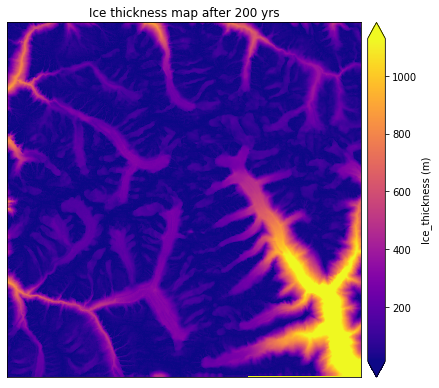

In [31]:
fig,ax=plt.subplots(1,1,figsize=(8,5.5))
#ax.imshow(H_map)
pltlib.iv(H_map,ax=ax,cmap='plasma',label='Ice_thickness (m)', title='Ice thickness map after 200 yrs')
#r = ax[1].imshow(I_map,cmap='plasma')
#ax[1].tick_params(labelbottom='False')
#ax[1].tick_params(labelleft='False')
#cbar = fig.colorbar(r,ax=ax[1])

In [18]:
I_map

array([[ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       ..., 
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.]])